In [27]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib
sns.set_style('whitegrid')

# Space

In [3]:
cat */crawls.stat

80000	83T	/home/hplt/hplt/one/warc/cc/CC-MAIN-2022-40
88000	93T	/home/hplt/hplt/one/warc/cc/CC-MAIN-2022-49
754143	768T	/home/hplt/hplt/one/warc/ia/wide00016
97948	94T	/home/hplt/hplt/two/warc/ia/survey_00003
378513	365T	/home/hplt/hplt/two/warc/ia/wide00005
209680	204T	/home/hplt/hplt/two/warc/ia/wide00006
94970	91T	/home/hplt/hplt/two/warc/ia/wide00010
431363	420T	/home/hplt/hplt/two/warc/ia/wide00011
457804	449T	/home/hplt/hplt/two/warc/ia/wide00012
361431	358T	/nird/home/nikolare/hplt/one/warc/ia/wide00015
662381	641T	/nird/home/nikolare/hplt/one/warc/ia/wide00017
124167	271T	/nird/home/nikolare/hplt/two/warc/archivebot/archivebot_partial
21053	43T	/nird/home/nikolare/hplt/two/warc/cc/CC-MAIN-2014-35
13782	54T	/nird/home/nikolare/hplt/two/warc/cc/CC-MAIN-2014-42
5046	29T	/nird/home/nikolare/hplt/two/warc/cc/CC-MAIN-2015-11
11067	30T	/nird/home/nikolare/hplt/two/warc/cc/CC-MAIN-2015-48
4046	54T	/nird/home/nikolare/hplt/two/warc/cc/CC-MAIN-2017-04
80000	75T	/nird/home/nikolare/hplt/t

In [4]:
tmp = pd.concat([pd.read_csv(p, sep='\t', header=None) for p  in Path('.').glob('*/crawls.stat')], 
                ignore_index=True)
tmp[1] = tmp[1].str.replace('T','000').str.replace('G','')  # T=1000G
tmp['TB-warc'] = tmp[1].astype(int) / 1000  # convert back to T; there is a small error in converting G (1000/1024)
tmp['crawl'] = tmp[2].str.split('/').str[-1]
tmp = tmp.groupby('crawl')['TB-warc'].max().reset_index()
tmp

,crawl,TB-warc
0,CC-MAIN-2013-20,0.242
1,CC-MAIN-2013-48,0.328
2,CC-MAIN-2014-10,0.340
3,CC-MAIN-2014-15,0.382
4,CC-MAIN-2014-23,0.560
...,...,...
98,wide00011,420.000
99,wide00012,449.000
100,wide00015,358.000
101,wide00016,768.000


In [5]:
sdf = pd.concat([pd.read_csv(p, sep='\t', header=None) for p  in Path('.').glob('*/html_sizes.tsv')], 
                ignore_index=True)
sdf['crawl'] = sdf[1].str.split('/').str[1]
sdf['TB-html'] = sdf[0] / 2**30
sdf = sdf.groupby('crawl')['TB-html'].sum().reset_index()
sdf

,crawl,TB-html
0,CC-MAIN-2013-20,0.110472
1,CC-MAIN-2013-48,0.129638
2,CC-MAIN-2014-10,0.140231
3,CC-MAIN-2014-15,0.157436
4,CC-MAIN-2014-23,0.205882
...,...,...
98,wide00011,79.035090
99,wide00012,90.777253
100,wide00015,54.127401
101,wide00016,143.564583


In [6]:
sdf = sdf.merge(tmp[['crawl','TB-warc']], on='crawl')
sdf['warc/html-ratio'] = sdf['TB-warc'] / sdf['TB-html']
sdf

,crawl,TB-html,TB-warc,warc/html-ratio
0,CC-MAIN-2013-20,0.110472,0.242,2.190604
1,CC-MAIN-2013-48,0.129638,0.328,2.530127
2,CC-MAIN-2014-10,0.140231,0.340,2.424566
3,CC-MAIN-2014-15,0.157436,0.382,2.426380
4,CC-MAIN-2014-23,0.205882,0.560,2.720009
...,...,...,...,...
98,wide00011,79.035090,420.000,5.314095
99,wide00012,90.777253,449.000,4.946173
100,wide00015,54.127401,358.000,6.614025
101,wide00016,143.564583,768.000,5.349509


/tmp/ipykernel_10705/4058421169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['full'] = pdf['TB-warc'] > 10
/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


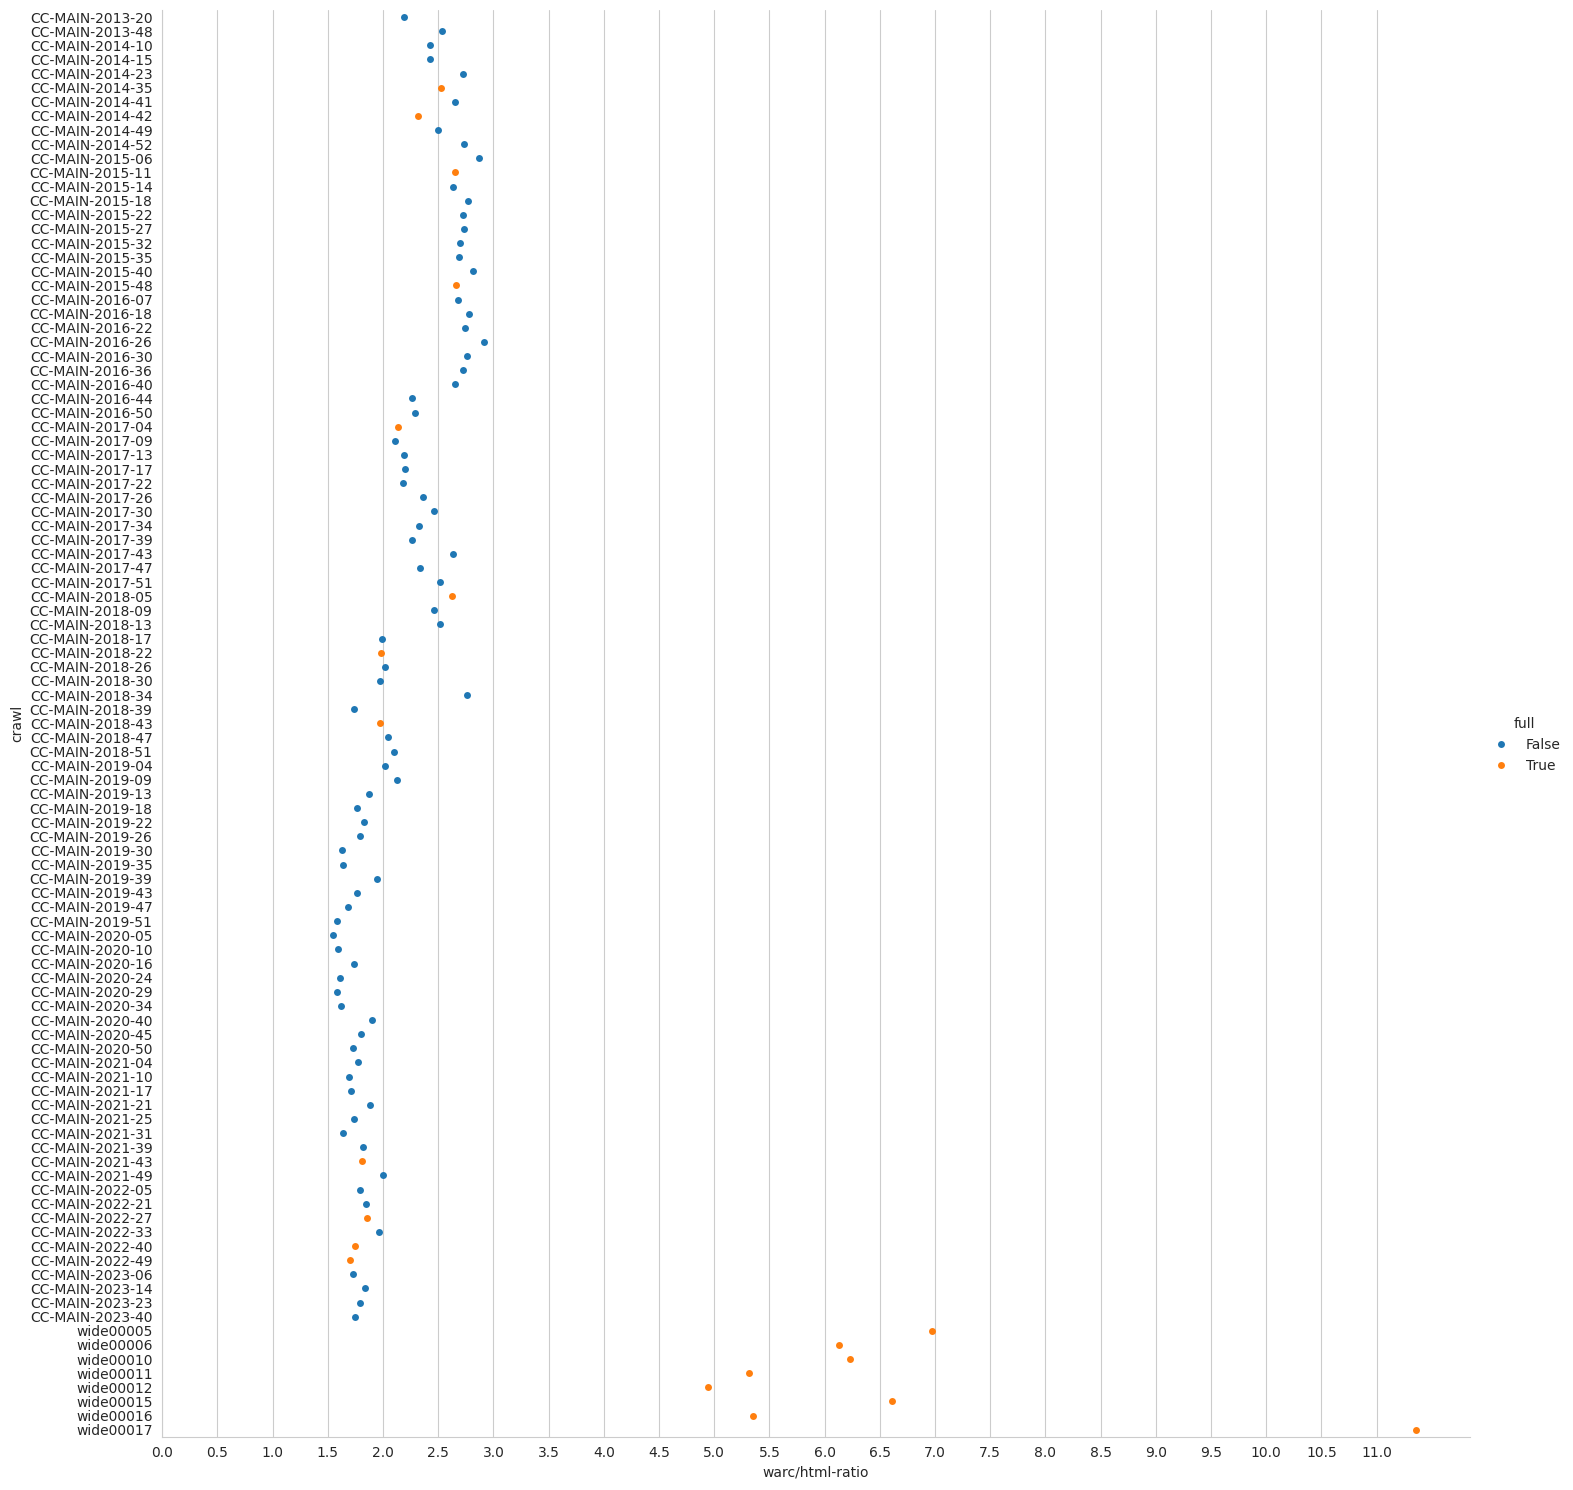

In [7]:
pdf = sdf[sdf.crawl.str.contains('CC|wide')]
pdf['full'] = pdf['TB-warc'] > 10
g = sns.catplot(data=pdf,y='crawl', x='warc/html-ratio', aspect=1, height=15, hue='full')
g.set(xticks=np.arange(0,pdf['warc/html-ratio'].max(), 0.5))

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


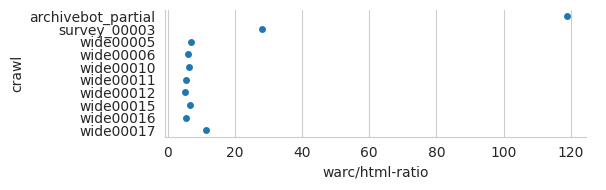

In [8]:

sns.catplot(data=sdf[~sdf.crawl.str.startswith('CC')],y='crawl', x='warc/html-ratio', aspect=3, height=2)

##### Ratios: 
* 1.5-2 for CC after 2018
* 2-3 for CC before 2018
* 5-7 for wide crawls
* 30 for survey_00003
* 120 for archivebot
    

# Time

In [9]:
dfs = []
for p in Path('./').glob('*/warc2html-time.csv'):
    df = pd.read_csv(p, sep=' +')
    df['datacenter'] = p.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.drop(index=df[df.crawl.isin(['CC-MAIN-2022-40', 'CC-MAIN-2022-49']) & (df.datacenter=='nirdl')].index, 
        inplace=True)
df

/tmp/ipykernel_10705/3107725856.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(p, sep=' +')
/tmp/ipykernel_10705/3107725856.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(p, sep=' +')


,crawl,nlogs,nparsed,cpu-seconds,datacenter
0,CC-MAIN-2022-40,80,80,20209116,cesnet
1,CC-MAIN-2022-49,88,88,22691823,cesnet
2,survey_00003,105,105,6707541,cesnet
3,wide00005,408,408,50557568,cesnet
4,wide00006,382,382,30610731,cesnet
...,...,...,...,...,...
100,CC-MAIN-2023-14,1,1,163347,nirdl
101,CC-MAIN-2023-23,1,1,162202,nirdl
102,CC-MAIN-2023-40,1,1,178000,nirdl
103,wide00015,390,390,76902581,nirdl


In [10]:
df[df['nlogs']!=df['nparsed']]

,crawl,nlogs,nparsed,cpu-seconds,datacenter
9,archivebot_partial,223,221,9441223,nirdl


In [11]:
df = df.groupby(['datacenter','crawl'])['cpu-seconds'].sum() / 3600 / 24
df = df.reset_index(name='cpu-days')

In [12]:
ndf = pd.DataFrame.from_dict(
    {'cesnet': 63*3,  # on CESNET warc2html was running on 3 nodes, 63 parallel tasks each, 
     'nirdl': 250*2}  # on NIRD warc2html was running on 2 nodes, 250 parallel tasks each, 
, orient='index',columns=['ncpus']).reset_index(names='datacenter')
ndf

,datacenter,ncpus
0,cesnet,189
1,nirdl,500


In [13]:
ndf = ndf.merge(df.groupby('datacenter')['cpu-days'].sum(), left_on='datacenter', right_index=True)
ndf['wallclockdays'] = ndf['cpu-days']/ndf['ncpus']
ndf

,datacenter,ncpus,cpu-days,wallclockdays
0,cesnet,189,4019.945810,21.269555
1,nirdl,500,4921.169502,9.842339


In [14]:
df = df.merge(sdf, on='crawl')
df

,datacenter,crawl,cpu-days,TB-html,TB-warc,warc/html-ratio
0,cesnet,CC-MAIN-2022-40,233.901806,47.466937,83.000,1.748586
1,cesnet,CC-MAIN-2022-49,262.636840,54.664654,93.000,1.701282
2,cesnet,survey_00003,77.633576,3.365744,94.000,27.928446
3,cesnet,wide00005,585.157037,52.377465,365.000,6.968646
4,cesnet,wide00006,354.290868,33.263690,204.000,6.132813
...,...,...,...,...,...,...
98,nirdl,CC-MAIN-2023-23,1.877338,0.495880,0.889,1.792773
99,nirdl,CC-MAIN-2023-40,2.060185,0.575792,1.007,1.748896
100,nirdl,archivebot_partial,109.273414,2.281308,271.000,118.791497
101,nirdl,wide00015,890.076169,54.127401,358.000,6.614025


In [15]:
df.groupby('datacenter')[['cpu-days','TB-warc','TB-html']].sum()

,cpu-days,TB-warc,TB-html
datacenter,,,
cesnet,4019.945810,2567.000,519.117250
nirdl,4921.169502,1881.547,400.812663


In [16]:
df['type'] = df.crawl.str.split('[\d_-]').str[0]

In [17]:
df['cpu-days/TB-warc'] = df['cpu-days'] / df['TB-warc']
df['cpu-days/TB-html'] = df['cpu-days'] / df['TB-html']

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


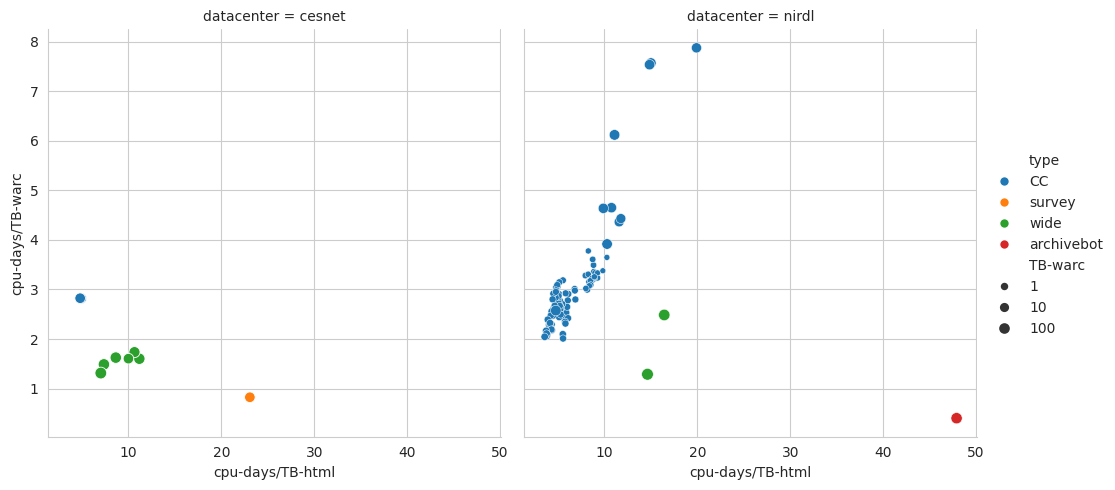

In [26]:

sns.relplot(data=df, x='cpu-days/TB-html', y='cpu-days/TB-warc', hue='type', col='datacenter', 
            size='TB-warc', size_norm=matplotlib.colors.LogNorm())

In [19]:
df['year'] = df.crawl.str.split('-').str[-2].astype(float)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


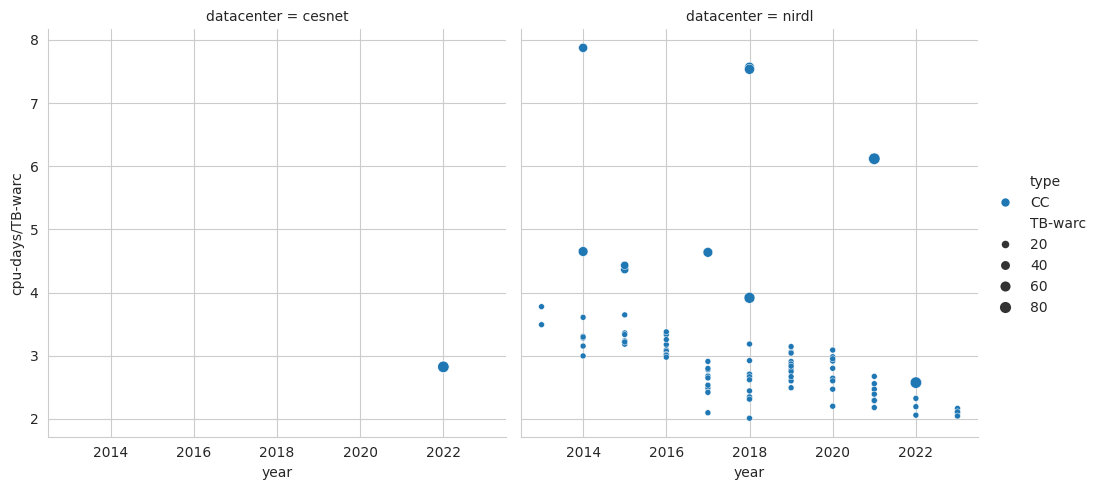

In [24]:
sns.relplot(data=df[df.type=='CC'], x='year', y='cpu-days/TB-warc', hue='type', col='datacenter', size='TB-warc')

/tmp/ipykernel_172768/1032577124.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(labels=g.get_xticklabels(),rotation=90)


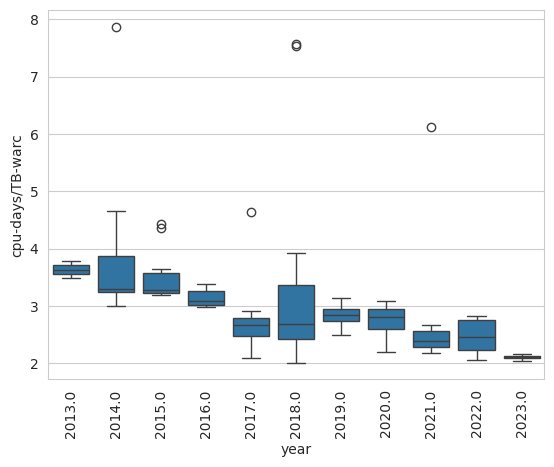

In [326]:
g = sns.boxplot(data=df[df.type=='CC'], x='year', y='cpu-days/TB-warc')
_ = g.set_xticklabels(labels=g.get_xticklabels(),rotation=90)

In [329]:
df[df.year==2018]

,datacenter,crawl,cpu-days,TB-html,TB-warc,warc/html-ratio,type,cpu-days/TB-warc,cpu-days/TB-html,year
50,nirdl,CC-MAIN-2018-05,293.808044,28.541193,75.000,2.627781,CC,3.917441,10.294175,2018.0
51,nirdl,CC-MAIN-2018-09,1.733403,0.299977,0.738,2.460186,CC,2.348784,5.778446,2018.0
52,nirdl,CC-MAIN-2018-13,1.605046,0.276102,0.694,2.513562,CC,2.312747,5.813233,2018.0
53,nirdl,CC-MAIN-2018-17,1.622153,0.278243,0.555,1.994656,CC,2.922798,5.829977,2018.0
54,nirdl,CC-MAIN-2018-22,393.693403,26.216467,52.000,1.983486,CC,7.571027,15.017027,2018.0
55,nirdl,CC-MAIN-2018-26,1.571470,0.287329,0.580,2.018595,CC,2.709431,5.469242,2018.0
56,nirdl,CC-MAIN-2018-30,1.672396,0.318267,0.627,1.970041,CC,2.667298,5.254688,2018.0
57,nirdl,CC-MAIN-2018-34,1.393727,0.250818,0.693,2.762964,CC,2.011150,5.556735,2018.0
58,nirdl,CC-MAIN-2018-39,1.564063,0.282087,0.491,1.740595,CC,3.185463,5.544602,2018.0
59,nirdl,CC-MAIN-2018-43,444.601782,29.911016,59.000,1.972517,CC,7.535623,14.864149,2018.0


# Predict

In [379]:
dfs=[]
for p in Path('../three/').glob('*/crawls.stat'):
    qdf = pd.read_csv(p, sep='\t', header=None)
    qdf['datacenter'] = p.parent.name
    dfs.append(qdf)
tmp = pd.concat(dfs, ignore_index=True)
tmp[1] = tmp[1].str.replace('T','000').str.replace('G','')  # T=1000G
tmp['TB-warc'] = tmp[1].astype(int) / 1000  # convert back to T; there is a small error in converting G (1000/1024)
tmp['crawl'] = tmp[2].str.split('/').str[-1]
tmp = tmp.drop(columns=[0,1,2])
tmp

,datacenter,TB-warc,crawl
0,cesnet,34.0,CC-MAIN-2015-18
1,cesnet,30.0,CC-MAIN-2016-30
2,cesnet,29.0,CC-MAIN-2016-40
3,cesnet,54.0,CC-MAIN-2016-44
4,cesnet,64.0,CC-MAIN-2017-26
5,cesnet,62.0,CC-MAIN-2017-51
6,cesnet,59.0,CC-MAIN-2019-04
7,cesnet,73.0,CC-MAIN-2021-39
8,cesnet,69.0,CC-MAIN-2022-33
9,cesnet,88.0,CC-MAIN-2023-14


In [380]:
tmp['year'] = tmp.crawl.str.split('-').str[2]
tmp['type'] = tmp.crawl.str.split('[\d_-]').str[0]
tmp

,datacenter,TB-warc,crawl,year,type
0,cesnet,34.0,CC-MAIN-2015-18,2015,CC
1,cesnet,30.0,CC-MAIN-2016-30,2016,CC
2,cesnet,29.0,CC-MAIN-2016-40,2016,CC
3,cesnet,54.0,CC-MAIN-2016-44,2016,CC
4,cesnet,64.0,CC-MAIN-2017-26,2017,CC
5,cesnet,62.0,CC-MAIN-2017-51,2017,CC
6,cesnet,59.0,CC-MAIN-2019-04,2019,CC
7,cesnet,73.0,CC-MAIN-2021-39,2021,CC
8,cesnet,69.0,CC-MAIN-2022-33,2022,CC
9,cesnet,88.0,CC-MAIN-2023-14,2023,CC


In [381]:
tmp = tmp.merge(sdf.set_index('crawl')['warc/html-ratio'], how='left', left_on='crawl', right_index=True)
tmp.sort_values(by='year')

,datacenter,TB-warc,crawl,year,type,warc/html-ratio
0,cesnet,34.0,CC-MAIN-2015-18,2015,CC,2.767164
1,cesnet,30.0,CC-MAIN-2016-30,2016,CC,2.760457
2,cesnet,29.0,CC-MAIN-2016-40,2016,CC,2.652441
3,cesnet,54.0,CC-MAIN-2016-44,2016,CC,2.259613
4,cesnet,64.0,CC-MAIN-2017-26,2017,CC,2.359266
5,cesnet,62.0,CC-MAIN-2017-51,2017,CC,2.517815
6,cesnet,59.0,CC-MAIN-2019-04,2019,CC,2.018161
22,nirdl,63.0,CC-MAIN-2020-16,2020,CC,1.736544
23,nirdl,54.0,CC-MAIN-2020-24,2020,CC,1.612403
24,nirdl,63.0,CC-MAIN-2020-29,2020,CC,1.580992


In [383]:
tmp.loc[tmp.type=='wide','warc/html-ratio'] = 5.0  # worst case
tmp.loc[(tmp['warc/html-ratio'].isnull())&(tmp.type=='CC'),'warc/html-ratio'] = 1.5 # worst case

In [391]:
tmp['TB-html-pred'] = tmp['TB-warc'] / tmp['warc/html-ratio']
tmp

,datacenter,TB-warc,crawl,year,type,warc/html-ratio,TB-html-pred
0,cesnet,34.0,CC-MAIN-2015-18,2015,CC,2.767164,12.286949
1,cesnet,30.0,CC-MAIN-2016-30,2016,CC,2.760457,10.867764
2,cesnet,29.0,CC-MAIN-2016-40,2016,CC,2.652441,10.933325
3,cesnet,54.0,CC-MAIN-2016-44,2016,CC,2.259613,23.897901
4,cesnet,64.0,CC-MAIN-2017-26,2017,CC,2.359266,27.127082
5,cesnet,62.0,CC-MAIN-2017-51,2017,CC,2.517815,24.624526
6,cesnet,59.0,CC-MAIN-2019-04,2019,CC,2.018161,29.234540
7,cesnet,73.0,CC-MAIN-2021-39,2021,CC,1.820626,40.096108
8,cesnet,69.0,CC-MAIN-2022-33,2022,CC,1.961264,35.181390
9,cesnet,88.0,CC-MAIN-2023-14,2023,CC,1.834011,47.982268


In [393]:
gdf = tmp.groupby('datacenter').sum(numeric_only=True)
gdf

,TB-warc,warc/html-ratio,TB-html-pred
datacenter,,,
cesnet,1384.0,41.450817,772.431853
nirdl,887.0,23.912457,519.596739


In [400]:
gdf['cpu-days-pred-min'] = gdf['TB-warc'] * 2
gdf['cpu-days-pred-max'] = gdf['TB-warc'] * 8
gdf = gdf.merge(ndf.set_index('datacenter')['ncpus'], left_index=True, right_index=True)
gdf

,TB-warc,warc/html-ratio,TB-html-pred,cpu-days-pred-min,cpu-days-pred-max,ncpus
datacenter,,,,,,
cesnet,1384.0,41.450817,772.431853,2768.0,11072.0,189
nirdl,887.0,23.912457,519.596739,1774.0,7096.0,500


In [405]:
for x in ('min','max'):
    print(gdf[f'cpu-days-pred-{x}'] / gdf['ncpus'])

datacenter
cesnet    14.645503
nirdl      3.548000
dtype: float64
datacenter
cesnet    58.582011
nirdl     14.192000
dtype: float64
